#Importing needed libreries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import skew, kurtosis, zscore
import seaborn as sns 
import openpyxl 
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading data and explorative analysis


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,Absence
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,Presence
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,Absence
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172.0,199.0,1,0,162.0,0,0.5,1,0,7,Absence
266,44,1,2,120.0,263.0,0,0,173.0,0,0.0,1,0,7,Absence
267,56,0,2,140.0,294.0,0,2,153.0,0,1.3,2,0,3,Absence
268,57,1,4,140.0,192.0,0,0,148.0,0,0.4,2,0,6,Absence


In [ ]:
data.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,Presence
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,Absence
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,Presence
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,Absence
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,Absence


In [ ]:
data.tail(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172.0,199.0,1,0,162.0,0,0.5,1,0,7,Absence
266,44,1,2,120.0,263.0,0,0,173.0,0,0.0,1,0,7,Absence
267,56,0,2,140.0,294.0,0,2,153.0,0,1.3,2,0,3,Absence
268,57,1,4,140.0,192.0,0,0,148.0,0,0.4,2,0,6,Absence
269,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,Presence


In [ ]:
data.shape

(270, 14)

In [ ]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       255 non-null    float64
 4   Cholesterol              253 non-null    float64
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   261 non-null    float64
 8   Exercise angina          270 non-null    int64  
 9   ST depression            266 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(4), int64(9), o

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,255.000000,253.000000,270.000000,270.000000,261.000000,270.000000,266.000000,270.000000,270.000000,270.000000
mean,54.433333,0.751852,3.322222,131.094118,248.758893,0.148148,1.022222,157.888889,0.329630,1.041729,1.585185,0.670370,4.696296
std,9.109067,0.964758,2.659742,18.116393,51.406345,0.355906,0.997891,100.789456,0.470952,1.141642,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,11.000000,44.000000,200.000000,564.000000,1.000000,2.000000,1380.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
print(data.isnull().sum())

Age                         0
Sex                         0
Chest pain type             0
BP                         15
Cholesterol                17
FBS over 120                0
EKG results                 0
Max HR                      9
Exercise angina             0
ST depression               4
Slope of ST                 0
Number of vessels fluro     0
Thallium                    0
Heart Disease               0
dtype: int64


In [ ]:
data['BP'] = data['BP'].interpolate(method = 'linear')
data['Cholesterol'] = data['Cholesterol'].interpolate(method = 'linear')
data['Max HR'] = data['Max HR'].interpolate(method = 'linear')
data['ST depression'] = data['ST depression'].interpolate(method = 'linear')

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.751852,3.322222,131.229630,247.938889,0.148148,1.022222,157.398148,0.329630,1.046111,1.585185,0.670370,4.696296
std,9.109067,0.964758,2.659742,17.853312,50.949237,0.355906,0.997891,99.166141,0.470952,1.138117,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.750000,0.000000,2.000000,165.000000,1.000000,1.712500,2.000000,1.000000,7.000000
max,77.000000,11.000000,44.000000,200.000000,564.000000,1.000000,2.000000,1380.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
print(data.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


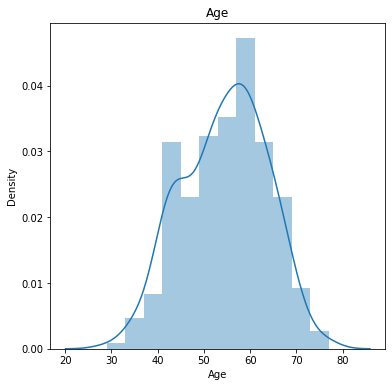

In [ ]:
plt.figure(figsize = (6,6))
g = sns.distplot(a = data['Age'])
p = plt.title('Age')

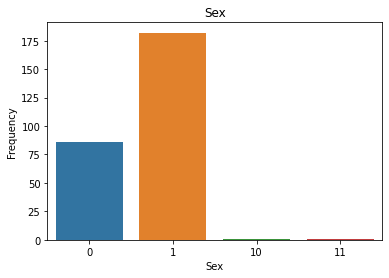

In [ ]:
subplot(1,1,1)
g = sns.countplot(x = 'Sex', data = data)
p = plt.title('Sex')
p = plt.xlabel('Sex')
p = plt.ylabel('Frequency')

In [ ]:
data['Sex'] = data['Sex'].replace([10],0)
data['Sex'] = data['Sex'].replace([11],1)
data['Sex'] = data['Sex'].replace([0], 'Female')
data['Sex'] = data['Sex'].replace([1], 'Male')

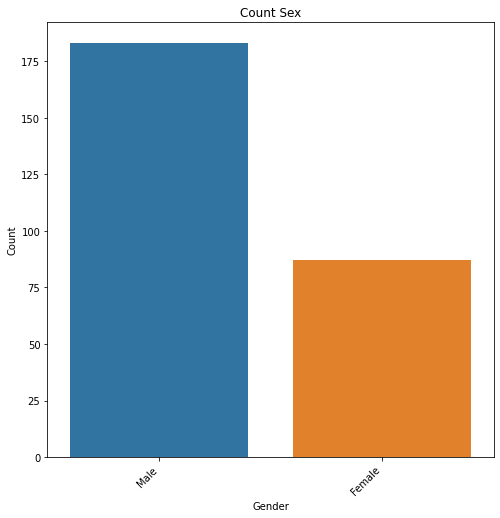

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Sex', data = data, order = data['Sex'].value_counts().index)
p = plt.title('Count Sex')
p = plt.xlabel('Gender')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

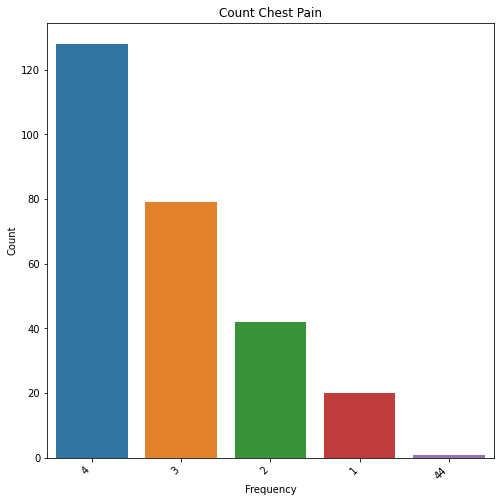

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Chest pain type', data = data, order = data['Chest pain type'].value_counts().index)
p = plt.title('Count Chest Pain')
p = plt.xlabel('Frequency')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [ ]:
data['Chest pain type'] = data['Chest pain type'].replace([44],4)

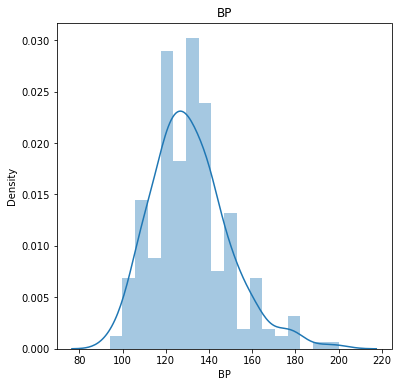

In [ ]:
plt.figure(figsize = (6,6))
g = sns.distplot(a = data['BP'])
p = plt.title('BP')

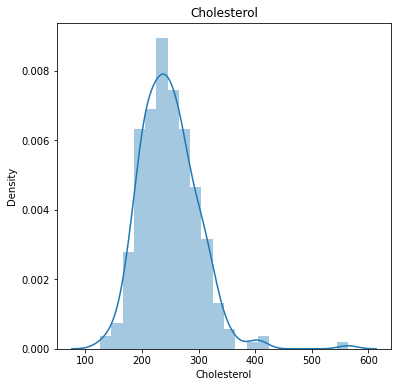

In [ ]:
plt.figure(figsize = (6,6))
g = sns.distplot(a = data['Cholesterol'])
p = plt.title('Cholesterol')

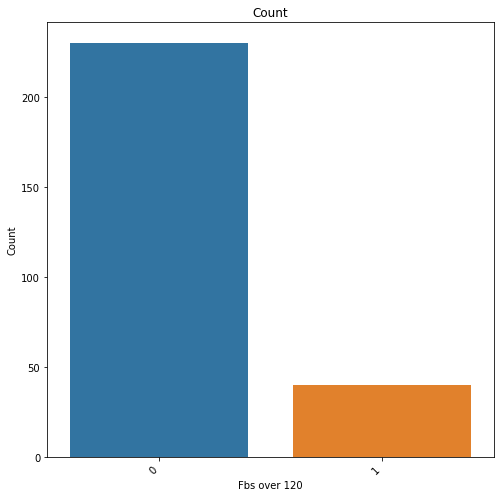

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'FBS over 120', data = data, order = data['FBS over 120'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Fbs over 120')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

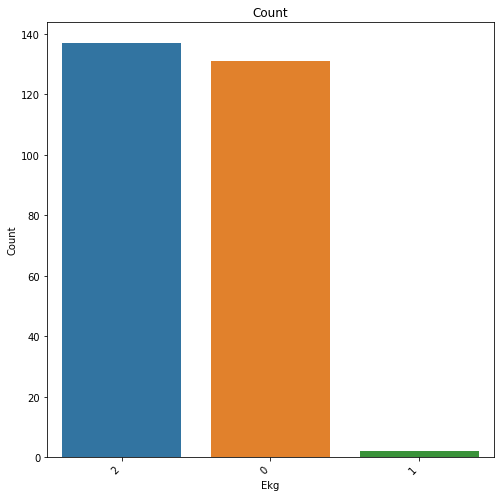

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'EKG results', data = data, order = data['EKG results'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Ekg')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

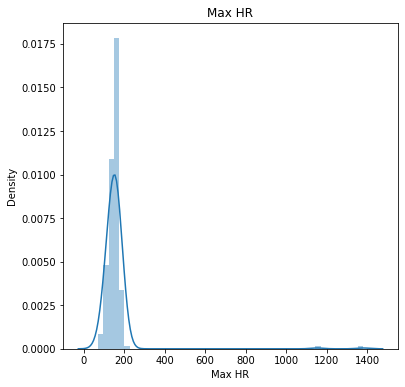

In [ ]:
plt.figure(figsize = (6,6))
g = sns.distplot(a = data['Max HR'])
p = plt.title('Max HR')

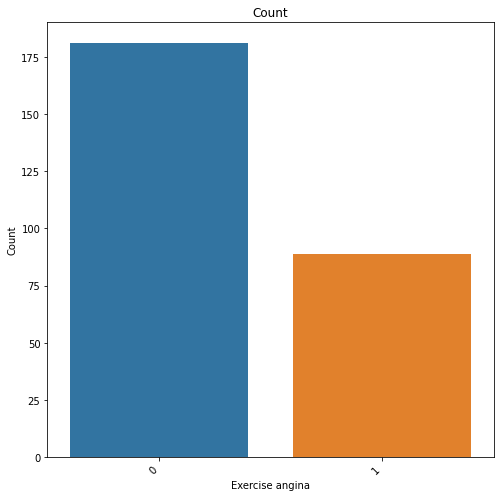

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Exercise angina', data = data, order = data['Exercise angina'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Exercise angina')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

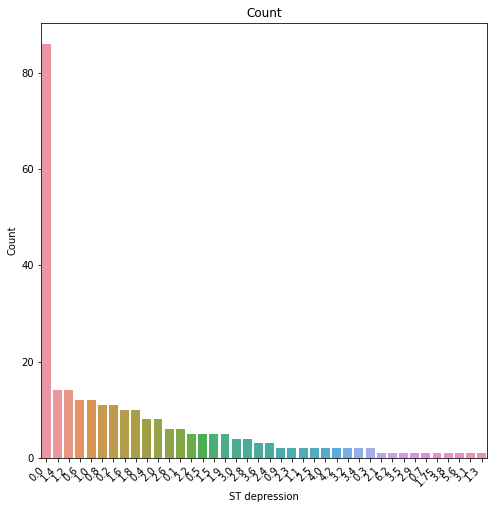

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'ST depression', data = data, order = data['ST depression'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('ST depression')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

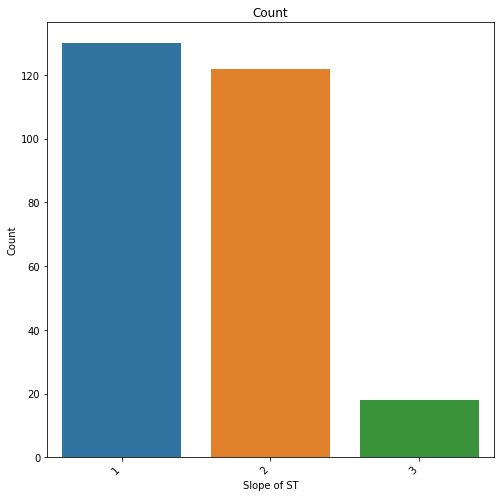

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Slope of ST', data = data, order = data['Slope of ST'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Slope of ST')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

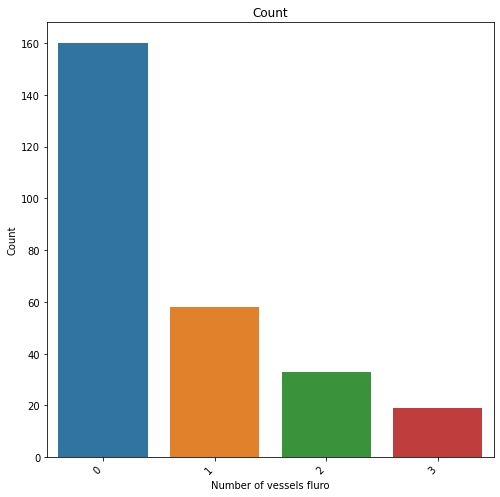

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Number of vessels fluro', data = data, order = data['Number of vessels fluro'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Number of vessels fluro')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

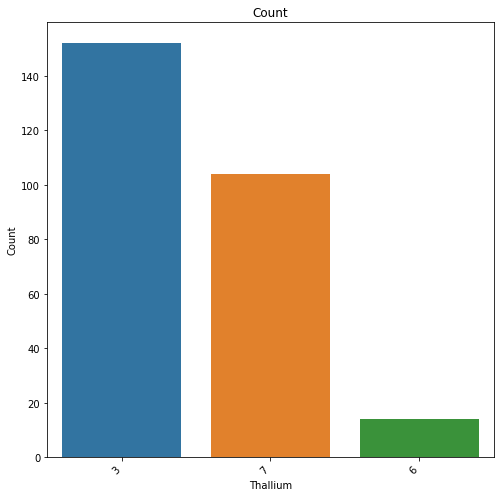

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Thallium', data = data, order = data['Thallium'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Thallium')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

In [ ]:
data['Heart Disease'] = data['Heart Disease'].replace({'Presence': 1, 'Absence': 0})

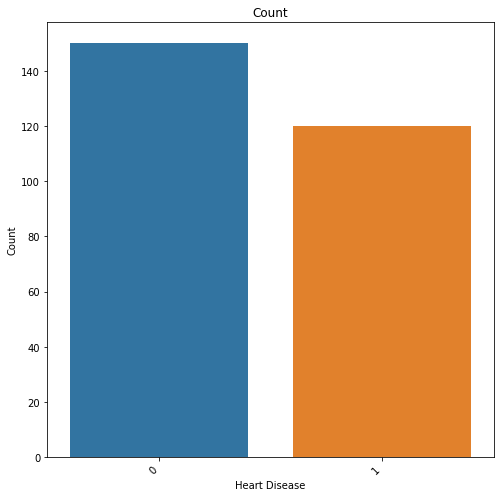

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot (x = 'Heart Disease', data = data, order = data['Heart Disease'].value_counts().index)
p = plt.title('Count')
p = plt.xlabel('Heart Disease')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#Outliers


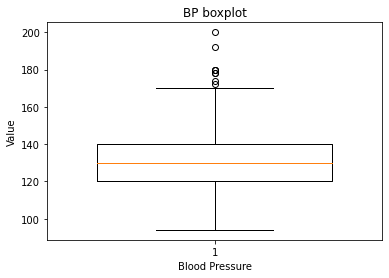

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['BP'], widths=0.7)

ax.set_xlabel('Blood Pressure')
ax.set_ylabel('Value')
ax.set_title('BP boxplot')

plt.show()

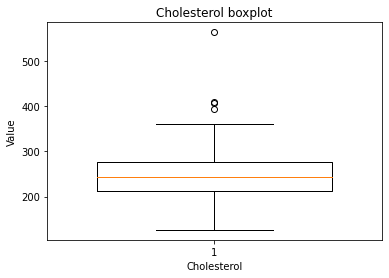

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['Cholesterol'], widths=0.7)

ax.set_xlabel('Cholesterol')
ax.set_ylabel('Value')
ax.set_title('Cholesterol boxplot')

plt.show()

In [ ]:
outliers_cholesterol = data[data['Cholesterol'] > 350]
print(outliers_cholesterol)

     Age     Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
1     67  Female                3  115.0        564.0             0   
9     63  Female                4  150.0        407.0             0   
71    57  Female                4  120.0        354.0             0   
123   65  Female                3  160.0        360.0             0   
181   56  Female                4  134.0        409.0             0   
188   62  Female                4  140.0        394.0             0   
257   55    Male                4  132.0        353.0             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
1              2   160.0                0            1.6            2   
9              2  1154.0                0            4.0            2   
71             0   163.0                1            0.6            1   
123            2   151.0                0            0.8            1   
181            2   150.0                1            1.9          

In [ ]:
cholesterol_mean = data['Cholesterol'].mean()
data['Cholesterol'] = data['Cholesterol'].replace([564.0],cholesterol_mean)
data.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,3.174074,131.229630,246.768292,0.148148,1.022222,157.398148,0.329630,1.046111,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.950090,17.853312,47.149696,0.355906,0.997891,99.166141,0.470952,1.138117,0.614390,0.943896,1.940659,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.712500,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,409.000000,1.000000,2.000000,1380.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


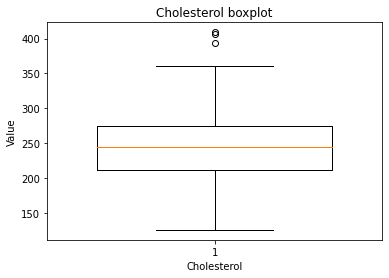

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['Cholesterol'], widths=0.7)

ax.set_xlabel('Cholesterol')
ax.set_ylabel('Value')
ax.set_title('Cholesterol boxplot')

plt.show()

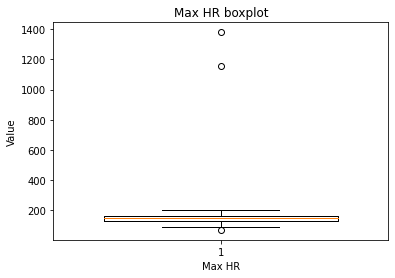

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['Max HR'], widths=0.7)

ax.set_xlabel('Max HR')
ax.set_ylabel('Value')
ax.set_title('Max HR boxplot')

plt.show()

In [ ]:
outliers_Max_HR = data[data['Max HR'] > 400]
print(outliers_Max_HR)

     Age     Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
9     63  Female                4  150.0        407.0             0   
109   45  Female                2  112.0        160.0             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
9              2  1154.0                0            4.0            2   
109            0  1380.0                0            0.0            2   

     Number of vessels fluro  Thallium  Heart Disease  
9                          3         7              1  
109                        0         3              0  


In [ ]:
max_hr_mean = data['Max HR'].mean()
data['Max HR'] = data['Max HR'].replace([1154.0],max_hr_mean)
data['Max HR'] = data['Max HR'].replace([1380.0],max_hr_mean)
data.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,3.174074,131.229630,246.768292,0.148148,1.022222,149.178875,0.329630,1.046111,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.950090,17.853312,47.149696,0.355906,0.997891,22.741040,0.470952,1.138117,0.614390,0.943896,1.940659,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.712500,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


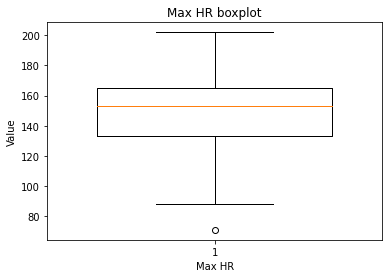

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['Max HR'], widths=0.7)

ax.set_xlabel('Max HR')
ax.set_ylabel('Value')
ax.set_title('Max HR boxplot')

plt.show()

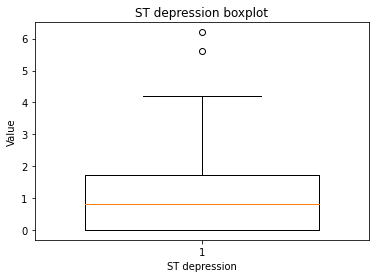

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['ST depression'], widths=0.7)

ax.set_xlabel('ST depression')
ax.set_ylabel('Value')
ax.set_title('ST depression boxplot')

plt.show()

In [ ]:
outliers_ST_depression = data[data['ST depression'] > 4]
print(outliers_ST_depression)

     Age     Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
87    59    Male                1  178.0        270.0             0   
156   55    Male                4  140.0        217.0             0   
176   51    Male                4  144.0        298.0             0   
235   62  Female                4  160.0        164.0             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
87             2   145.0                0            4.2            3   
156            0   111.0                1            5.6            3   
176            0   122.0                1            4.2            2   
235            2   145.0                0            6.2            3   

     Number of vessels fluro  Thallium  Heart Disease  
87                         0         7              0  
156                        0         7              1  
176                        3         7              1  
235                        3         7              1 

In [ ]:
st_depression_mean = data['ST depression'].mean()
data['ST depression'] = data['ST depression'].replace([5.6],st_depression_mean)
data['ST depression'] = data['ST depression'].replace([6.2],st_depression_mean)
data.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,3.174074,131.229630,246.768292,0.148148,1.022222,149.178875,0.329630,1.010156,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.950090,17.853312,47.149696,0.355906,0.997891,22.741040,0.470952,1.057438,0.614390,0.943896,1.940659,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


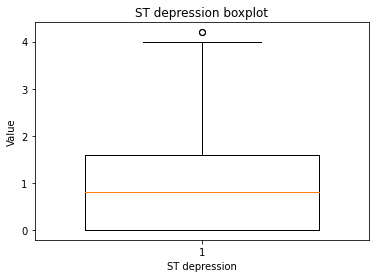

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['ST depression'], widths=0.7)

ax.set_xlabel('ST depression')
ax.set_ylabel('Value')
ax.set_title('ST depression boxplot')

plt.show()

# Check Normality

In [ ]:
for col in data.columns:
    if data[col].dtype != 'object': 
        col_skewness = skew(data[col])
        col_kurtosis = kurtosis(data[col])
        print(f'{col} skewness: {col_skewness:.2f}')
        print(f'{col} kurtosis: {col_kurtosis:.2f}')

Age skewness: -0.16
Age kurtosis: -0.56
Chest pain type skewness: -0.87
Chest pain type kurtosis: -0.31
BP skewness: 0.74
BP kurtosis: 0.92
Cholesterol skewness: 0.45
Cholesterol kurtosis: 0.38
FBS over 120 skewness: 1.98
FBS over 120 kurtosis: 1.92
EKG results skewness: -0.04
EKG results kurtosis: -1.99
Max HR skewness: -0.58
Max HR kurtosis: -0.06
Exercise angina skewness: 0.72
Exercise angina kurtosis: -1.47
ST depression skewness: 0.93
ST depression kurtosis: 0.11
Slope of ST skewness: 0.54
Slope of ST kurtosis: -0.62
Number of vessels fluro skewness: 1.20
Number of vessels fluro kurtosis: 0.27
Thallium skewness: 0.29
Thallium kurtosis: -1.89
Heart Disease skewness: 0.22
Heart Disease kurtosis: -1.95


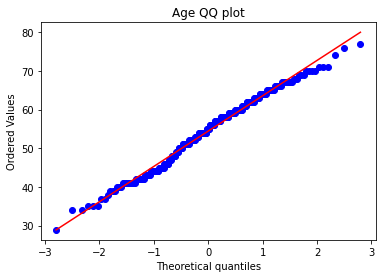

In [ ]:
age = data['Age']

probplot(age, plot=plt)
plt.title('Age QQ plot')

plt.show()

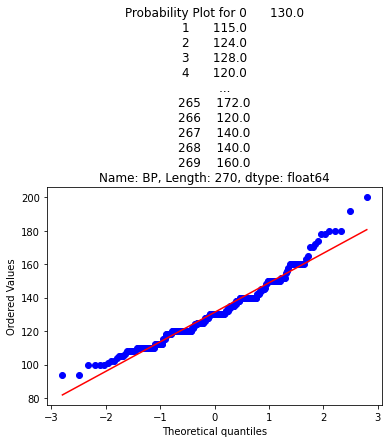

In [ ]:
BP = data['BP']
if data['BP'].dtype != 'object':
    probplot(data['BP'], plot=plt)
    plt.title(f'Probability Plot for {BP}')
    plt.show()

In [ ]:
FBS = 'FBS over 120'
z_score = (data['FBS over 120'] - np.mean(data['FBS over 120'])) / np.std(data['FBS over 120'])
print(z_score.iloc[0])

-0.4170288281141495


In [ ]:
EKG = 'EKG results'
z_score = (data['EKG results'] - np.mean(data['EKG results'])) / np.std(data['EKG results'])
print(z_score.iloc[0])

0.9816636461569526


In [ ]:
Number_of_vessels_fluro = 'Number of vessels fluro'
z_score = (data['Number of vessels fluro'] - np.mean(data['Number of vessels fluro'])) / np.std(data['Number of vessels fluro'])
print(z_score.iloc[0])

2.4726821928767904


In [ ]:
Exercise_angina = 'Exercise angina'
z_score = (data['FBS over 120'] - np.mean(data['Exercise angina'])) / np.std(data['Exercise angina'])
print(z_score.iloc[0])


-0.7012222951263888


In [ ]:
Thallium = 'Thallium'
z_score = (data['Thallium'] - np.mean(data['Thallium'])) / np.std(data['Thallium'])
print(z_score.iloc[0])

-0.8757058119953168


In [ ]:
Heart_disease = 'Heart Disease'
z_score = (data['Heart Disease'] - np.mean(data['Heart Disease'])) / np.std(data['Heart Disease'])
print(z_score.iloc[0])

1.118033988749895


In [ ]:
stat, p = kstest(data['Number of vessels fluro'],'norm')
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed (reject H0)')

Data is not normally distributed (reject H0)


# Scatter plots


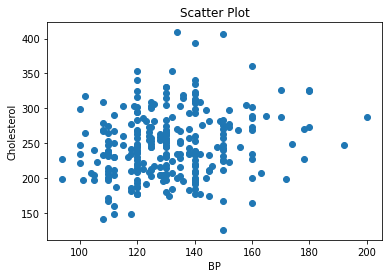

In [ ]:
x = data['BP']
y = data['Cholesterol']
plt.scatter(x, y)
plt.xlabel('BP')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot')
plt.show()

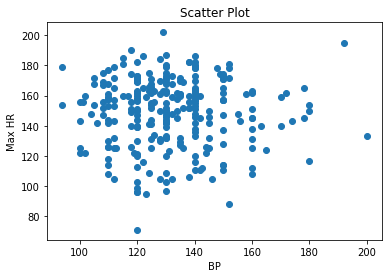

In [ ]:
x = data['BP']
y = data['Max HR']
plt.scatter(x, y)
plt.xlabel('BP')
plt.ylabel('Max HR')
plt.title('Scatter Plot')
plt.show()

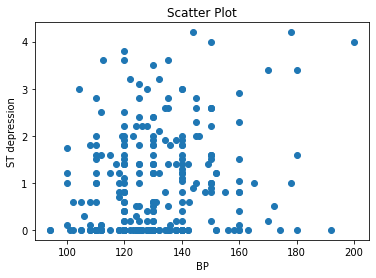

In [ ]:
x = data['BP']
y = data['ST depression']
plt.scatter(x, y)
plt.xlabel('BP')
plt.ylabel('ST depression')
plt.title('Scatter Plot')
plt.show()

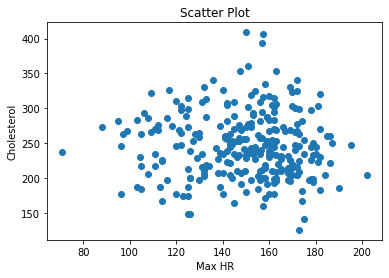

In [ ]:
x = data['Max HR']
y = data['Cholesterol']
plt.scatter(x, y)
plt.xlabel('Max HR')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot')
plt.show()

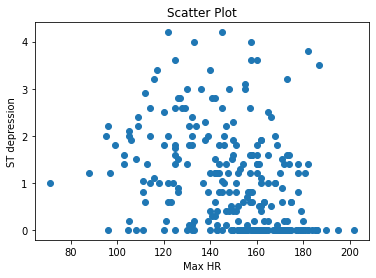

In [ ]:
x = data['Max HR']
y = data['ST depression']
plt.scatter(x, y)
plt.xlabel('Max HR')
plt.ylabel('ST depression')
plt.title('Scatter Plot')
plt.show()

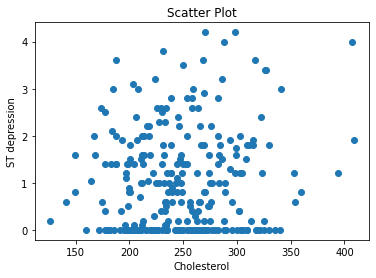

In [ ]:
x = data['Cholesterol']
y = data['ST depression']
plt.scatter(x, y)
plt.xlabel('Cholesterol')
plt.ylabel('ST depression')
plt.title('Scatter Plot')
plt.show()

In [ ]:
corr_matrix = data.corr(method = 'pearson')

corr_matrix = corr_matrix.round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,0.100000,0.260000,0.170000,0.120000,0.130000,-0.370000,0.100000,0.210000,0.160000,0.360000,0.110000,0.210000
Chest pain type,0.100000,1.000000,-0.060000,0.130000,-0.100000,0.070000,-0.300000,0.350000,0.150000,0.140000,0.230000,0.260000,0.420000
BP,0.260000,-0.060000,1.000000,0.200000,0.180000,0.130000,-0.020000,0.050000,0.180000,0.110000,0.070000,0.130000,0.130000
Cholesterol,0.170000,0.130000,0.200000,1.000000,0.010000,0.100000,-0.030000,0.130000,0.110000,0.010000,0.160000,0.020000,0.190000
FBS over 120,0.120000,-0.100000,0.180000,0.010000,1.000000,0.050000,0.010000,-0.000000,-0.010000,0.040000,0.120000,0.050000,-0.020000
EKG results,0.130000,0.070000,0.130000,0.100000,0.050000,1.000000,-0.060000,0.100000,0.140000,0.160000,0.110000,0.010000,0.180000
Max HR,-0.370000,-0.300000,-0.020000,-0.030000,0.010000,-0.060000,1.000000,-0.360000,-0.330000,-0.370000,-0.260000,-0.240000,-0.410000
Exercise angina,0.100000,0.350000,0.050000,0.130000,-0.000000,0.100000,-0.360000,1.000000,0.290000,0.260000,0.150000,0.320000,0.420000
ST depression,0.210000,0.150000,0.180000,0.110000,-0.010000,0.140000,-0.330000,0.290000,1.000000,0.580000,0.250000,0.310000,0.410000
Slope of ST,0.160000,0.140000,0.110000,0.010000,0.040000,0.160000,-0.370000,0.260000,0.580000,1.000000,0.110000,0.280000,0.340000
